# Project: Housing Prices

# Analysing and Building Machine Learning Algrothms For The Boston Housing Dataset From Kaggle

In this task, I going to work on a Boston dataset which consists information about the location of the house, price and other aspects such as square feet etc. I also need to see which column is important for me and which is not. 

The main aim is to make a model which can give me a good prediction on the price of the house based on other variables. I am going to use Linear Regression and Random Forest Regressor for this dataset and see whether thay give me a good accuracy or not.

### Table of Contents:

1. Overview
2. Motivation
3. Understand the Problem Statement
4. About the Dataset.
5. About the Algorithms used in
6. Data Collections
7. Data Preprocessing
8. Exploratory Data Analysis(EDA)
9. Feature Observation
10. Feature Selection
11. Model Building
12. Model Performances
13. Prediction and Final Score
14. Output

## 1. Overview

In this task, I am going to do implementing a salable model for predicting the house price prediction using some of the regression techniques based of some of features in the dataset which is called Boston House Price Prediction. 

There are some of the processing techniques for creating a model. 

## 2. Motivation

The motivation of this exrcise is that as part of my an MSc project I wand to analse the Boston dataset and aply many machne learning algorithms and compare thier performance and accuracy and want to know the house prices in California. 

In this project, house prices will be predicted given explanatory variables that cover many aspects of residential houses. The goal of this project is to create a regression model that is able to accurately estimate the price of the house given the features.

## 3. Understand the Problem Statement

Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers. 

## 4. About the Dataset

In this case study I am going to use Boston Housing Dataset from Kaggle, and I will apply different machine learning algorithms and I will compare them with each other to see which algorithm is more accurate. The Dataset is a derived from information collected by the U.S. Census Service concerning housing in Boston MA. And it has 506 observations and 13 features and a label variable.

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. There are 506 observations with 13 features (independent variables)like the number of rooms(rm),crime_rate(crim), air pollution variable(nox),cost of public services in each community(tax),pupil-teacher ratio(ptratio),etc. The dependent/target variable is house price that is given in thousand dollars.


## 5. Data Overview

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* AX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## 6. About the Algorithms used in

The major aim of in this project is to predict the house prices based on the features using some of the regression techniques and algorithms.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 7. Data Collection

I got the Dataset from Kaggle. This Dataset consist several features such as Number of Rooms, Crime Rate, and Tax and so on. First, I Will read the dataset into the Jupyter Notebook. 

In [2]:
# Import the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 8. Data Preprocessing

I will show to number of null or missing values in the dataset. As well as I need to understand shape of the dataset.

In [3]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [5]:
# Checking null values for training dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The target variable is the last one which is called medv. So I cannot able to get confusion so I just rename the feature name medv into Price.

In [6]:
# Here lets change ‘medv’ column name to ‘Price’
data.rename(columns={'MEDV':'Price'}, inplace=True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 9. Exploratory Data Analysis

In statistics, exploratory data analysis (EDA) is an approach to analysing data sets to summarise their main characteristics, often with visual methods. 

A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [7]:
# Information about the dataset features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# Let's summarize the data to see the distribution of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting Price (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of Price. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict Price. Let's plot the dataset and see interesting trends/stats.

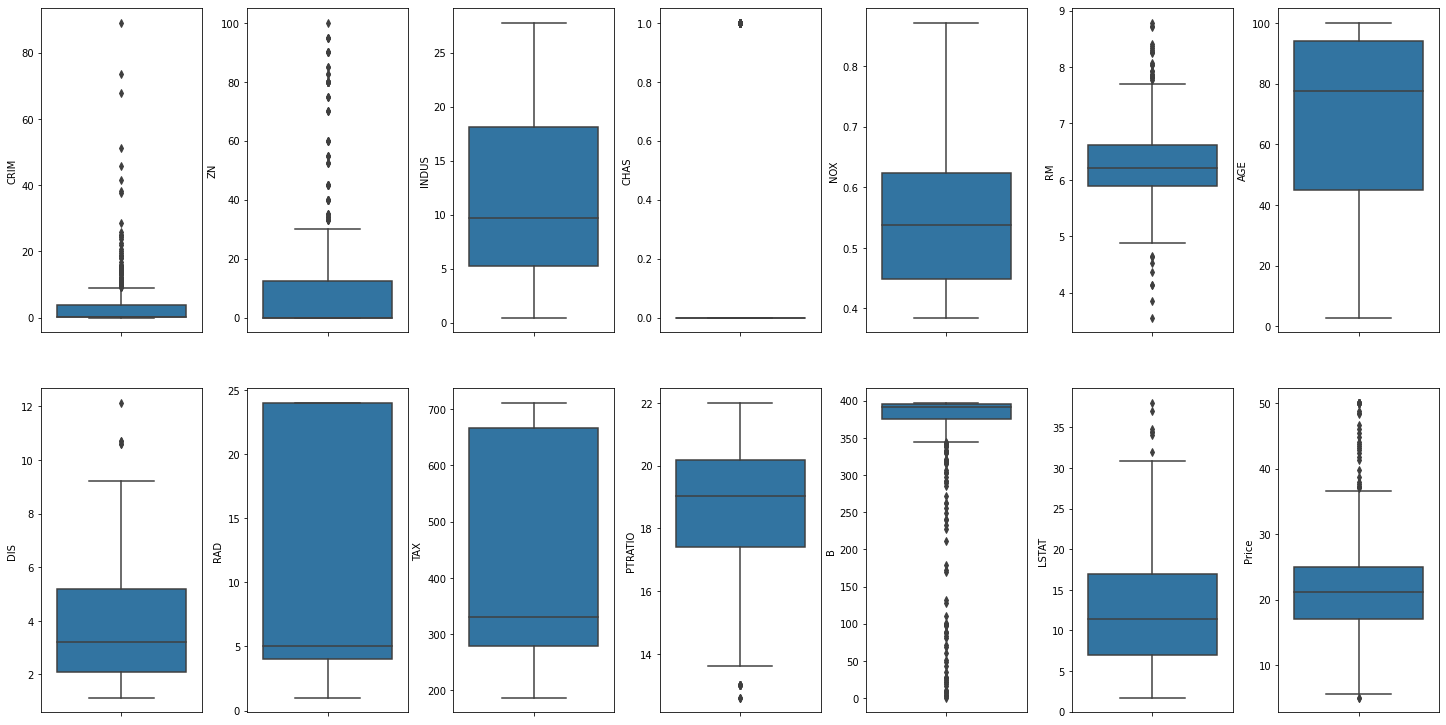

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [10]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column Price outliers = 7.91%


Let's remove price outliers (Prince = 50.0) before plotting more distributions

In [11]:
data = data[~(data['Price'] >= 50.0)]
print(np.shape(data))

(490, 14)


Let's see how these features plus Price distributions looks like

C:\Users\tsega\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tsega\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tsega\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

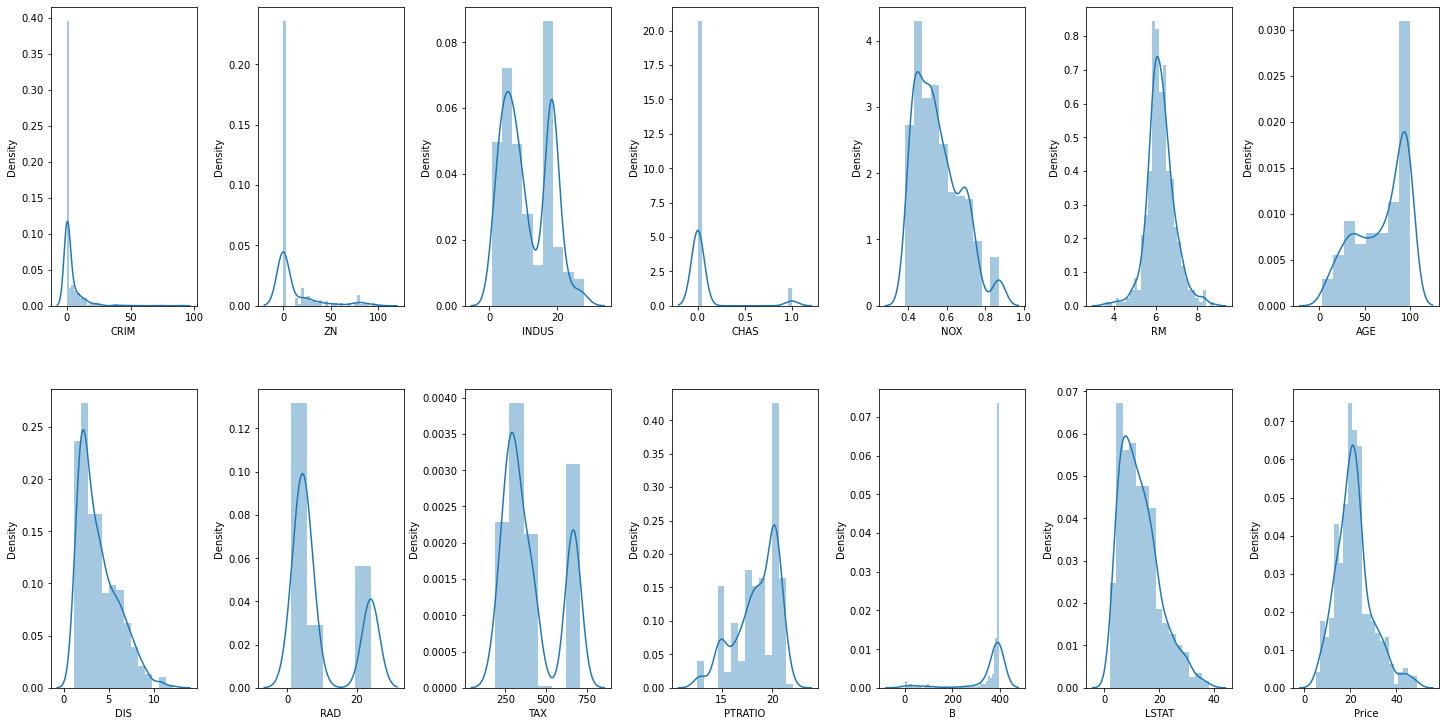

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also Price looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

## 10. Feature Observation

In [13]:
# Finding out the correlation between the features
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
ZN,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
INDUS,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
CHAS,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
NOX,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
RM,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
AGE,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
DIS,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
RAD,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
TAX,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


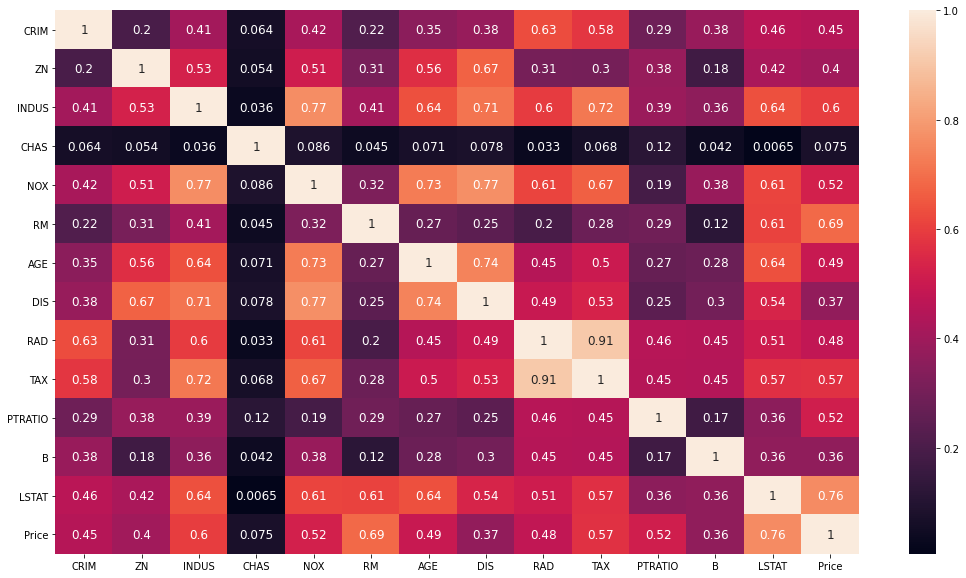

In [14]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat.abs(), annot = True, annot_kws={'size': 12})
plt.show()

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with Price which is a good indication of using as predictors. Let's plot these columns against Price.

<AxesSubplot:>

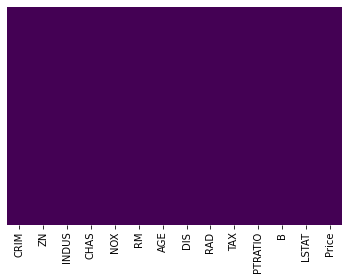

In [15]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No null or missing values.

<AxesSubplot:xlabel='RAD', ylabel='count'>

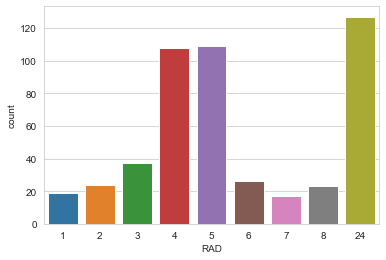

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=data)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

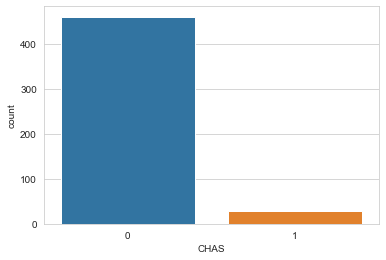

In [17]:
sns.countplot(x='CHAS',data=data)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

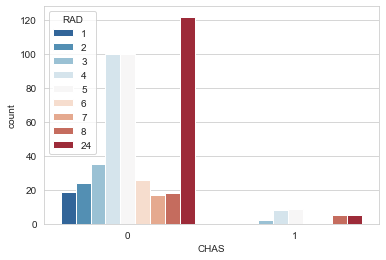

In [18]:
sns.countplot(x='CHAS',hue='RAD',data=data,palette='RdBu_r')

C:\Users\tsega\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

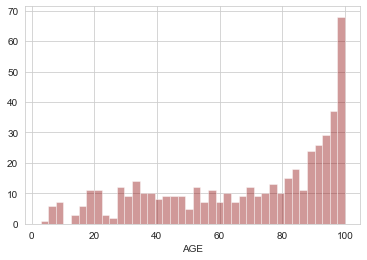

In [19]:
sns.distplot(data['AGE'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='CRIM'>

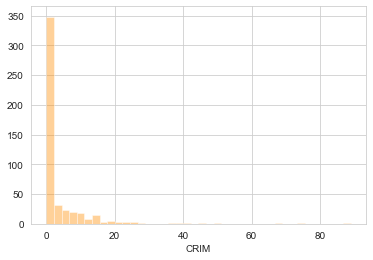

In [20]:
sns.distplot(data['CRIM'].dropna(),kde=False,color='darkorange',bins=40)

<AxesSubplot:xlabel='RM'>

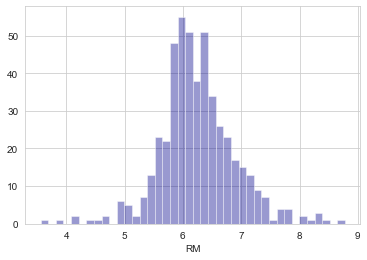

In [21]:
sns.distplot(data['RM'].dropna(),kde=False,color='darkblue',bins=40)

## 11. Feature Selection

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. 

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

In [22]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>= threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [23]:
threshold = 0.5
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value 

,Corr Value
INDUS,-0.600005
NOX,-0.524451
RM,0.686634
TAX,-0.572442
PTRATIO,-0.518641
LSTAT,-0.759837
Price,1.000000


In [24]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()

In [25]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['Price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

In [26]:
x.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015,0.268711,0.641607
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962,0.348524,0.782698
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962,0.348524,0.599382
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794,0.448173,0.441813
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794,0.448173,0.528321


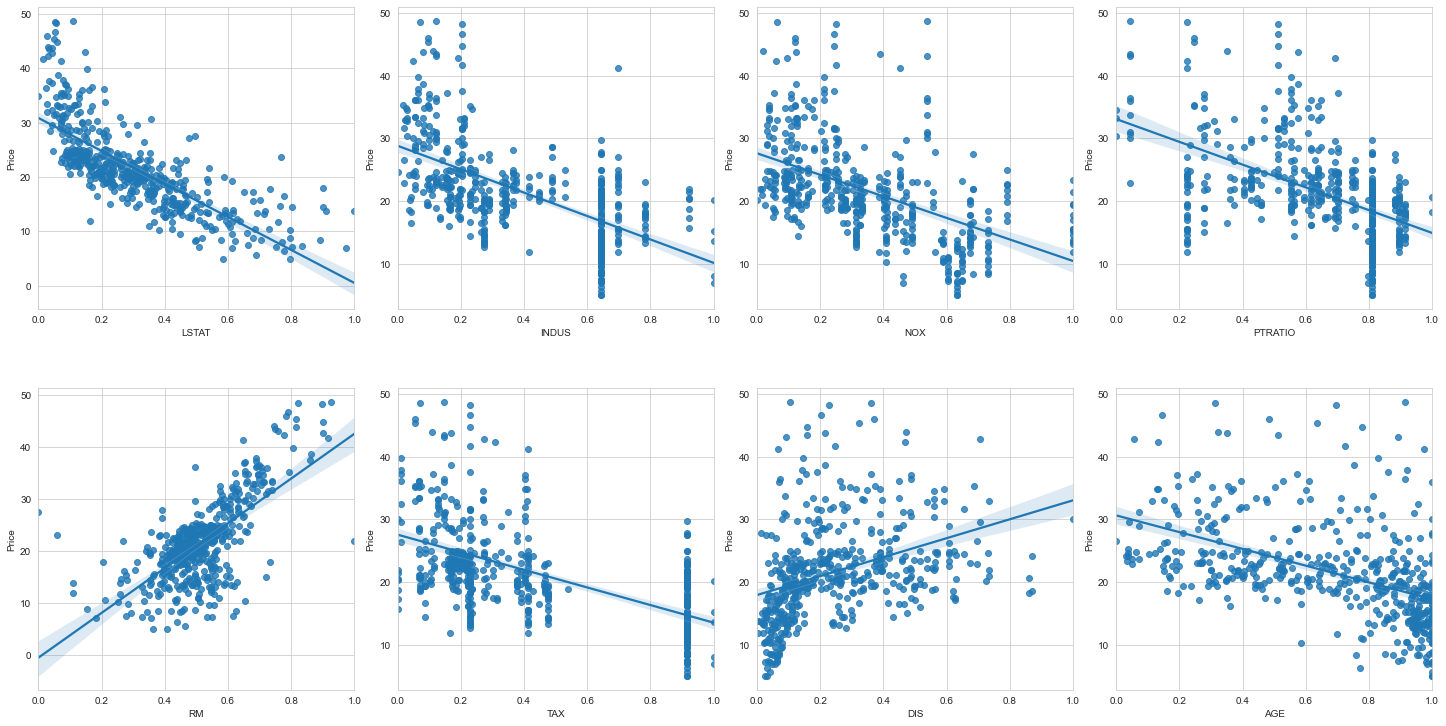

In [27]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

So with these analsis, we may try predict Price with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [28]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [29]:
x.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675
1,0.181441,0.210621,0.159428,0.440312,0.547998,0.099811,0.299010,0.578128
2,0.055397,0.210621,0.159428,0.440312,0.694386,0.099811,0.299010,0.469617
3,0.026325,0.051960,0.139941,0.500130,0.658555,0.064658,0.370303,0.365901
4,0.089001,0.051960,0.139941,0.500130,0.687105,0.064658,0.370303,0.424170


#### Feature Selection

In [30]:
# Lets try to understand which are important feature for this dataset

X = data.iloc[:,0:13] #independent columns
y = data.iloc[:,-1] #target column i.e price range

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = np.round(data['Price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5455.166045
1,ZN,5984.060727
2,INDUS,874.825595
3,CHAS,42.937435
4,NOX,5.072645
5,RM,18.313836
6,AGE,2414.941561
7,DIS,155.934159
8,RAD,1448.583661
9,TAX,14824.276270


In [32]:
score = pd.DataFrame(featureScores.nlargest(5,'Score')) #print 5 best features
score

,Specs,Score
9,TAX,14824.276270
1,ZN,5984.060727
0,CRIM,5455.166045
11,B,3318.991097
6,AGE,2414.941561


## 12. Feature Importance¶

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [35]:
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

[0.11696352 0.0233091  0.04122161 0.014078   0.06712322 0.1386376
 0.12180038 0.1067025  0.03621741 0.04300735 0.04438259 0.11124675
 0.13530996]


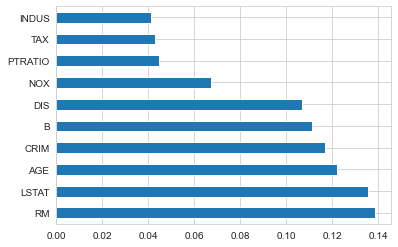

In [36]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()